## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-09-13 01:31:09,304: Qubit 0 adicionado à memória do Host 0.
2024-09-13 01:31:09,305: Qubit 0 criado com fidelidade inicial 0.8119747186526008 e adicionado à memória do Host 0.
2024-09-13 01:31:09,305: Qubit 1 adicionado à memória do Host 0.
2024-09-13 01:31:09,307: Qubit 1 criado com fidelidade inicial 0.8258235299213998 e adicionado à memória do Host 0.
2024-09-13 01:31:09,307: Qubit 2 adicionado à memória do Host 0.
2024-09-13 01:31:09,307: Qubit 2 criado com fidelidade inicial 0.016445756922888632 e adicionado à memória do Host 0.
2024-09-13 01:31:09,308: Qubit 3 adicionado à memória do Host 0.
2024-09-13 01:31:09,308: Qubit 3 criado com fidelidade inicial 0.6186664981087197 e adicionado à memória do Host 0.
2024-09-13 01:31:09,308: Qubit 4 adicionado à memória do Host 0.
2024-09-13 01:31:09,308: Qubit 4 criado com fidelidade inicial 0.3418491057529546 e adicionado à memória do Host 0.
2024-09-13 01:31:09,308: Qubit 5 adicionado à memória do Host 0.
2024-09-13 01:31:09,310: Qub

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


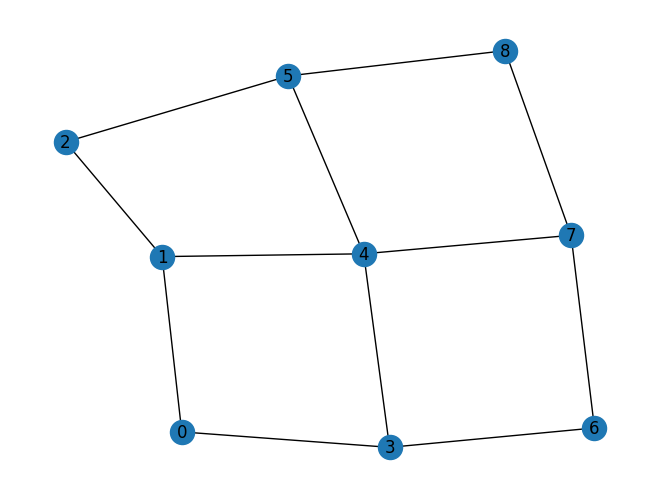

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-09-13 01:31:10,069: Qubit 1 adicionado à memória do Host 3.
2024-09-13 01:31:10,070: Qubit 2 adicionado à memória do Host 6.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x00000131D14B6F90>, <quantumnet.objects.qubit.Qubit object at 0x00000131D12FEAE0>, <quantumnet.objects.qubit.Qubit object at 0x00000131D14B6D20>, <quantumnet.objects.qubit.Qubit object at 0x00000131D12FEFC0>, <quantumnet.objects.qubit.Qubit object at 0x00000131D13BE0F0>, <quantumnet.objects.qubit.Qubit object at 0x00000131D1263020>, <quantumnet.objects.qubit.Qubit object at 0x00000131D0F4EF30>, <quantumnet.objects.qubit.Qubit object at 0x00000131D0F4FA40>, <quantumnet.objects.qubit.Qubit object at 0x00000131D14B6E70>, <quantumnet.objects.qubit.Qubit object at 0x00000131D0AE7B30>, <quantumnet.objects.qubit.Qubit object at 0x00000131CF5E9640>]
[<quantumnet.objects.qubit.Qubit object at 0x00000131D14B56A0>, <quantumnet.objects.qubit.Qubit object at 0x00000131D14B55B0>, <quantumnet.objects.qubit.Qubit object at 0x00000131D1325700>, <quantumnet.objects.qubit.Qubit object at 0x00000131D14B5910>, <quantumnet.objects.qubit.Qubit object at 0x00000131D

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()

##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-09-13 01:31:10,096: A fidelidade inicial do qubit 1 é 0.7738147657581395
2024-09-13 01:31:10,098: A fidelidade inicial do qubit 2 é 0.8118568340269824
2024-09-13 01:31:10,099: Fidelidade combinada entre qubit 1 e qubit 2: 0.6282268058517341.


0.6282268058517341

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-09-13 01:31:10,106: A fidelidade inicial do qubit 1 é 0.7738147657581395


0.7738147657581395

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-13 01:31:10,115: Timeslot 1: Par epr criado com fidelidade 0.21463881828151268
2024-09-13 01:31:10,116: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


Fidelidade do qubit 0 atualizada para 0.7307772467873408
Fidelidade do qubit 1 atualizada para 0.7432411769292598
Fidelidade do qubit 2 atualizada para 0.01480118123059977
Fidelidade do qubit 3 atualizada para 0.5567998482978477
Fidelidade do qubit 4 atualizada para 0.30766419517765914
Fidelidade do qubit 5 atualizada para 0.7961444443996781
Fidelidade do qubit 6 atualizada para 0.6375362768225613
Fidelidade do qubit 7 atualizada para 0.1514482621947454
Fidelidade do qubit 8 atualizada para 0.17131719699397147
Fidelidade do qubit 9 atualizada para 0.3787759498291141
Fidelidade do qubit 10 atualizada para 0.5214917703728985
Fidelidade do qubit 11 atualizada para 0.7648995016955142
Fidelidade do qubit 12 atualizada para 0.8417982722545373
Fidelidade do qubit 13 atualizada para 0.2620546662777348
Fidelidade do qubit 14 atualizada para 0.6061502824674901
Fidelidade do qubit 15 atualizada para 0.5481842961894332
Fidelidade do qubit 16 atualizada para 0.5282756367413461
Fidelidade do qubit 1

False

In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-09-13 01:31:10,127: A fidelidade atualizada do qubit 1 após decoerência é 0.766076618100558


Fidelidade do qubit 1 atualizada para 0.766076618100558


0.766076618100558

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_demand(2,5)

2024-09-13 01:31:10,138: A fidelidade atualizada do qubit 29 após decoerência é 0.7154060175846244
2024-09-13 01:31:10,139: A fidelidade atualizada do qubit 59 após decoerência é 0.08263920466490354
2024-09-13 01:31:10,139: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


Fidelidade do qubit 0 atualizada para 0.591929569897746
Fidelidade do qubit 1 atualizada para 0.6020253533127005
Fidelidade do qubit 2 atualizada para 0.011988956796785815
Fidelidade do qubit 3 atualizada para 0.4510078771212566
Fidelidade do qubit 4 atualizada para 0.2492079980939039
Fidelidade do qubit 5 atualizada para 0.6448769999637394
Fidelidade do qubit 6 atualizada para 0.5164043842262747
Fidelidade do qubit 7 atualizada para 0.12267309237774378
Fidelidade do qubit 8 atualizada para 0.1387669295651169
Fidelidade do qubit 9 atualizada para 0.3068085193615825
Fidelidade do qubit 10 atualizada para 0.4224083340020478
Fidelidade do qubit 11 atualizada para 0.6195685963733666
Fidelidade do qubit 12 atualizada para 0.6818566005261752
Fidelidade do qubit 13 atualizada para 0.21226427968496522
Fidelidade do qubit 14 atualizada para 0.490981728798667
Fidelidade do qubit 15 atualizada para 0.44402927991344093
Fidelidade do qubit 16 atualizada para 0.42790326576049037
Fidelidade do qubit 

False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [12]:
rede.physical.echp_on_replay(2,5)

2024-09-13 01:31:10,147: A fidelidade atualizada do qubit 28 após decoerência é 0.17715768863379658
2024-09-13 01:31:10,148: A fidelidade atualizada do qubit 58 após decoerência é 0.3772390650570557
2024-09-13 01:31:10,148: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


Fidelidade do qubit 0 atualizada para 0.5327366129079715
Fidelidade do qubit 1 atualizada para 0.5418228179814304
Fidelidade do qubit 2 atualizada para 0.010790061117107234
Fidelidade do qubit 3 atualizada para 0.40590708940913095
Fidelidade do qubit 4 atualizada para 0.22428719828451352
Fidelidade do qubit 5 atualizada para 0.5803892999673654
Fidelidade do qubit 6 atualizada para 0.4647639458036472
Fidelidade do qubit 7 atualizada para 0.1104057831399694
Fidelidade do qubit 8 atualizada para 0.12489023660860522
Fidelidade do qubit 9 atualizada para 0.2761276674254243
Fidelidade do qubit 10 atualizada para 0.380167500601843
Fidelidade do qubit 11 atualizada para 0.5576117367360299
Fidelidade do qubit 12 atualizada para 0.6136709404735577
Fidelidade do qubit 13 atualizada para 0.1910378517164687
Fidelidade do qubit 14 atualizada para 0.44188355591880035
Fidelidade do qubit 15 atualizada para 0.39962635192209683
Fidelidade do qubit 16 atualizada para 0.38511293918444134
Fidelidade do qub

False

In [13]:
rede.get_total_useds_eprs()

2024-09-13 01:31:10,162: Eprs usados na camada PhysicalLayer: 1
2024-09-13 01:31:10,162: Eprs usados na camada LinkLayer: 0
2024-09-13 01:31:10,163: Eprs usados na camada NetworkLayer: 0


1

In [14]:
rede.get_total_useds_qubits()

2024-09-13 01:31:10,170: Qubits usados na camada PhysicalLayer: 6
2024-09-13 01:31:10,171: Qubits usados na camada LinkLayer: 0
2024-09-13 01:31:10,171: Qubits usados na camada TransportLayer: 0
2024-09-13 01:31:10,172: Qubits usados na camada ApplicationLayer: 0


6

##### Acessando o canal que mostra as probablidades e os pares eprs


In [15]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.5353604667958101,
 'prob_replay_epr_create': 0.3513550047298254,
 'eprs': [<quantumnet.objects.epr.Epr at 0x131d14dc3b0>,
  <quantumnet.objects.epr.Epr at 0x131d14f4aa0>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [16]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x131d14debd0>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x131d13bf710>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x131d14df140>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x131d14dffe0>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x131d14dc3b0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x131d14f4830>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x131d14dd1c0>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x131d14f4f20>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x131d14de090>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x131d14de7b0>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x131d14de360>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x131d14dec30>,
  <quantumnet.objects.epr.Epr at 0x131d14f6f90>]}

In [17]:
rede.get_timeslot()

4